## GM 알고리즘 계산
- 2023.11.01

### ROE 계산할 데이터 가져오기

In [1]:
import pandas as pd

In [2]:
# 데이터 가이드에서 가져온 데이터 불러오기
data_guide_df = pd.read_excel("가치주.xlsx")

In [3]:
# 데이터 가이드 데이터프레임 전처리
col = data_guide_df[11:12]

In [4]:
data = data_guide_df[13:]

In [5]:
# concat
df = pd.concat([col, data])

In [6]:
# 금융 수익 삭제(이미 금융 손익 컬럼이 존재. 이 컬럼만 사용해도 무방)
df.drop(['Unnamed: 4'], axis=1, inplace=True)

In [7]:
# 첫행을 컬럼으로 지정
df.columns = df.iloc[0]

In [8]:
# 첫행 삭제(컬럼으로 이미 지정함)
df.drop(df.index[0], inplace=True)

In [9]:
# 첫열 이름 변경
df.rename(columns= {'Item Name':'Date'}, inplace=True)

In [10]:
# Date 컬럼 날짜 형식으로 바꿔주기
df['Date'] = pd.to_datetime(df['Date']) 

In [11]:
# 원하는 날짜(2022-07-01 ~ 2023-06-31) 데이터만 가져오기
df = df[(df['Date'] >= '2022-07-01') & (df['Date'] <= '2023-06-30')]

In [12]:
df.head()

11,Date,영업이익(원),금융손익(비영업)(원),관계기업투자등관련손익(비영업)(원),종가(원),수정주가(원)
142,2022-07-01,1357569000000,-191014000000,-75909000000,52800,52800
143,2022-07-04,1357569000000,-191014000000,-75909000000,53600,53600
144,2022-07-05,1357569000000,-191014000000,-75909000000,54200,54200
145,2022-07-06,1357569000000,-191014000000,-75909000000,53800,53800
146,2022-07-07,1357569000000,-191014000000,-75909000000,53800,53800


### PBR 데이터 가져오기

In [13]:
# KRX(한국거래소)에서 받아온 기업별 pbr이 포함된 csv 파일 불러오기
pbr_df = pd.read_csv('./pbr_data/sk_pbr_data.csv', encoding='EUC-KR')

In [14]:
# 필요한 컬럼만 가져오기
pbr_df = pbr_df[['일자','PBR']]

In [15]:
# 일자 오름차순으로 정렬(df가 오름차순으로 되어 있어서 통일성 있게 하려고)
pbr_df = pbr_df.sort_values(by='일자')

In [16]:
# 일자 컬럼을 Date 변경
pbr_df.rename(columns={'일자':'Date'}, inplace=True)

In [17]:
# 시간 타입으로 변경
pbr_df['Date'] = pd.to_datetime(pbr_df['Date']) 

In [18]:
# df와 pbr_df를 Date 컬럼을 기준으로 merge
df = pd.merge(df, pbr_df, on='Date', how='outer')

In [19]:
df

,Date,영업이익(원),금융손익(비영업)(원),관계기업투자등관련손익(비영업)(원),종가(원),수정주가(원),PBR
0,2022-07-01,1357569000000,-191014000000,-75909000000,52800,52800,0.99
1,2022-07-04,1357569000000,-191014000000,-75909000000,53600,53600,1.01
2,2022-07-05,1357569000000,-191014000000,-75909000000,54200,54200,1.02
3,2022-07-06,1357569000000,-191014000000,-75909000000,53800,53800,1.01
4,2022-07-07,1357569000000,-191014000000,-75909000000,53800,53800,1.01
...,...,...,...,...,...,...,...
256,2023-06-26,958187000000,-97545000000,9672000000,47350,47350,0.91
257,2023-06-27,958187000000,-97545000000,9672000000,47600,47600,0.92
258,2023-06-28,958187000000,-97545000000,9672000000,47650,47650,0.92
259,2023-06-29,958187000000,-97545000000,9672000000,46250,46250,0.89


### COE 계산을 위한 rf 데이터 불러오기

- rf: risk free(미국채 10년물)

In [20]:
import yfinance as yf

us_10_year = yf.download("^TNX", start="2022-07-01", end="2023-06-30")
us_10_year

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-01,2.932,2.932,2.791,2.889,2.889,0
2022-07-05,2.871,2.871,2.780,2.809,2.809,0
2022-07-06,2.784,2.924,2.746,2.913,2.913,0
2022-07-07,2.937,3.017,2.928,3.008,3.008,0
2022-07-08,2.984,3.101,2.976,3.101,3.101,0
...,...,...,...,...,...,...
2023-06-23,3.727,3.760,3.692,3.739,3.739,0
2023-06-26,3.702,3.737,3.679,3.719,3.719,0
2023-06-27,3.714,3.776,3.692,3.768,3.768,0


In [21]:
# 미국채 Close 컬럼명 변경
us_10_year.rename(columns={'Close':'us_10_treasury'}, inplace=True)

In [22]:
# Date 인덱스를 컬럼으로
us_10_year = us_10_year.reset_index()

In [23]:
# 필요한 컬럼만 추출
us_10_year = us_10_year[['Date', 'us_10_treasury']]

In [24]:
# 기존 df와 us_10_year데이터를 Date컬럼 기준으로 merge
df = pd.merge(df, us_10_year, on='Date', how='outer')

In [25]:
# na 존재하는 행 출력
#df[df.isna().any(axis=1)]

In [26]:
# PBR이 NA인 행 삭제. PBR이 NA라는 것은 영업일이 아니라는 의미이기 때문
df = df.dropna(subset=['PBR'])

In [27]:
# us_10_treasury의 na 값을 ffill로(전날)데이터로 채워줌
df['us_10_treasury'] = df['us_10_treasury'].fillna(method='ffill')

Equity의 값은 데이터가 아니라 수동으로 가져옴

URL: https://comp.fnguide.com/SVO2/ASP/SVD_Finance.asp?pGB=1&gicode=A017670&cID=&MenuYn=Y&ReportGB=B&NewMenuID=103&stkGb=701

- 2022년 3분기: 10515800000000
- 2022년 4분기: 10383400000000
- 2023년 1분기: 10689100000000
- 2023년 2분기: 10685400000000

In [28]:
# 분기별로 나누는 코드
def get_quarter(date):
    if date >= pd.Timestamp('2022-01-01') and date <= pd.Timestamp('2022-03-31'):
        return '2022Q1'
    elif date >= pd.Timestamp('2022-04-01') and date <= pd.Timestamp('2022-06-30'):
        return '2022Q2'
    elif date >= pd.Timestamp('2022-07-01') and date <= pd.Timestamp('2022-09-30'):
        return '2022Q3'
    elif date >= pd.Timestamp('2022-10-01') and date <= pd.Timestamp('2022-12-31'):
        return '2022Q4'
    elif date >= pd.Timestamp('2023-01-01') and date <= pd.Timestamp('2023-03-31'):
        return '2023Q1'
    elif date >= pd.Timestamp('2023-04-01') and date <= pd.Timestamp('2023-06-30'):
        return '2023Q2'
    else:
        return None

df['Quarter'] = df['Date'].apply(get_quarter)

In [29]:
# 해당하는 분기에 위에서 수동으로 가져온 equity 값 넣기
def assign_value(quarter):
    values = {
        '2022Q3': 10515800000000,
        '2022Q4': 10383400000000,
        '2023Q1': 10689100000000,
        '2023Q2': 10685400000000
    }
    return values.get(quarter, None)

df['equity'] = df['Quarter'].apply(assign_value)

### ROE 계산

순이익 = 영업이익 + 금융손익 + EMS *(1-20%)

(1-20%): 법인세

In [30]:
# 세전이익 생성
df['세전이익'] = df['영업이익(원)'] + df['금융손익(비영업)(원)'] + df['관계기업투자등관련손익(비영업)(원)']

In [31]:
# 순이익 계산
df['순이익'] = df['세전이익'] * (1-0.2) # 0.2 = 20%

In [32]:
# ROE 계산
df['ROE'] = df['순이익'] / df['equity']

In [33]:
# ROE 평균 계산
roe_values = df['ROE'].value_counts().index

In [34]:
# roe_values를 리스트로 변환하고, 각 원소를 float으로 변환합니다.
roe_values_numeric = [float(value) for value in roe_values]

# 평균 roe 계산
roe_average = sum(roe_values_numeric) / len(roe_values_numeric)

In [35]:
# ROE 값 지정
df['ROE'] = roe_average

### COE 계산

COE = rf + Beta(MRP)

- Beta: 1
- MRP: 4%
- rf: 미국 국채 10년물

In [36]:
# beta랑 MRP 값
beta = 1
MRP = 0.04

In [37]:
df['COE'] = df['us_10_treasury'] + beta*MRP

In [38]:
# ROE 단위 변경 -> % 단위로 변경
df['ROE'] = df['ROE'] * 100

### growth multiplier 계산

gm = PBR * COE / ROE

In [39]:
df['gm'] = (df['PBR'] * df['COE']) / df['ROE']

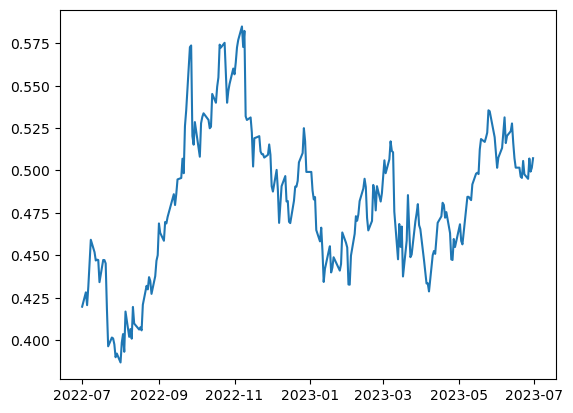

In [40]:
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['gm'])

In [41]:
# 모든 행 출력되도록
pd.set_option('display.max_rows', None)

### 시점&수익률 생성 

In [44]:
# 각 시점의 일주일, 이주일, 한달뒤 종가 값을 가진 컬럼 생성

# 일주일 후의 수정주가(원) 값
df['수정주가_1주후'] = df['수정주가(원)'].shift(-5)

# 이주일 후의 수정주가(원) 값
df['수정주가_2주후'] = df['수정주가(원)'].shift(-10)

# 한달 후의 수정주가(원) 값
df['수정주가_1달후'] = df['수정주가(원)'].shift(-20)

# 한달 후의 수정주가(원) 값
df['수정주가_3달후'] = df['수정주가(원)'].shift(-60)

In [45]:
# 각 시점의 1주후, 2주후, 한달후 수익률 구하기 + 수익률 -> %로

# 1주후 수익률 계산
df['수익률_1주후'] = (df['수정주가_1주후'] - df['수정주가(원)']) / df['수정주가(원)'] * 100

# 2주후 수익률 계산
df['수익률_2주후'] = (df['수정주가_2주후'] - df['수정주가(원)']) / df['수정주가(원)'] * 100

# 1달후 수익률 계산
df['수익률_1달후'] = (df['수정주가_1달후'] - df['수정주가(원)']) / df['수정주가(원)'] * 100

# 3달후 수익률 계산
df['수익률_3달후'] = (df['수정주가_3달후'] - df['수정주가(원)']) / df['수정주가(원)'] * 100

### 누적수익률로 계산

In [48]:
# 각 시점의 1주후, 2주후, 한달후 누적 수익률 구하기 + 수익률 -> %로

# 1주후 누적 수익률 계산
df['누적_수익률_1주후'] = ((1 + df['수익률_1주후'] / 100).cumprod() - 1) * 100

# 2주후 누적 수익률 계산
df['누적_수익률_2주후'] = ((1 + df['수익률_2주후'] / 100).cumprod() - 1) * 100

# 1달후 누적 수익률 계산
df['누적_수익률_1달후'] = ((1 + df['수익률_1달후'] / 100).cumprod() - 1) * 100

# 3달후 누적 수익률 계산
df['누적_수익률_3달후'] = ((1 + df['수익률_3달후'] / 100).cumprod() - 1) * 100

In [51]:
# 맥에서 한글 안꺠지게
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

/Users/kevincho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


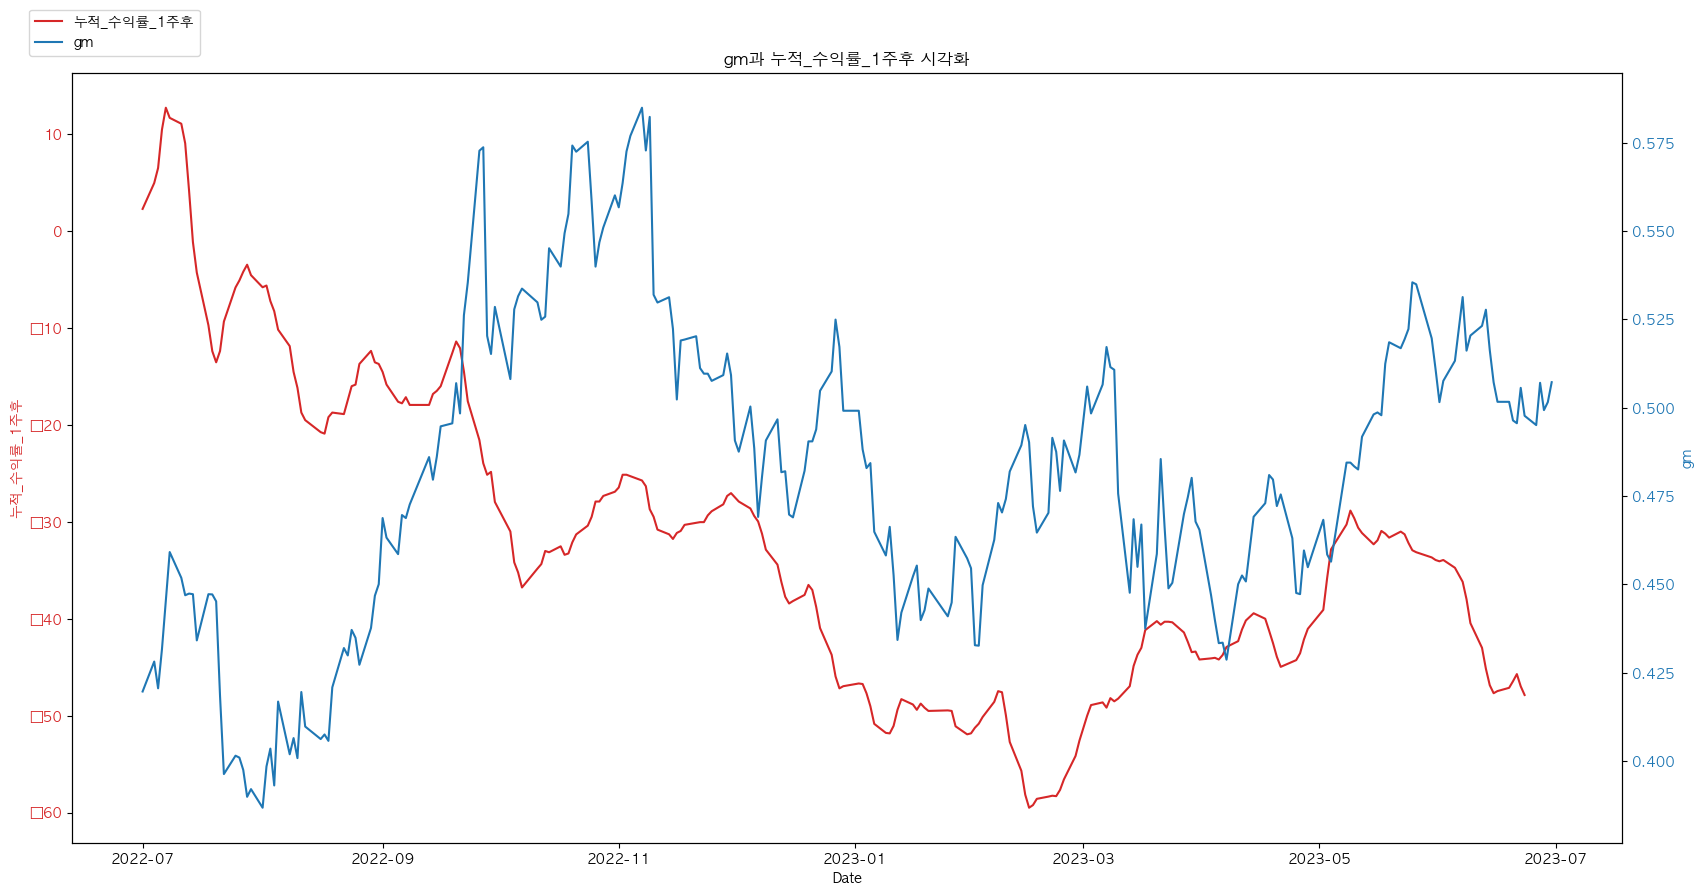

In [52]:
# 일주일뒤 수익률 시각화

# 그래프의 기본 틀 생성
fig, ax1 = plt.subplots(figsize=(20, 10))

# ax1에 '수익률_1주후' 그리기
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('누적_수익률_1주후', color=color)
line1, = ax1.plot(df['Date'], df['누적_수익률_1주후'], color=color, label='누적_수익률_1주후')  # label 추가
ax1.tick_params(axis='y', labelcolor=color)

# ax2는 ax1과 x축을 공유하며 y축은 독립적으로 사용
ax2 = ax1.twinx()

# ax2에 'gm' 그리기
color = 'tab:blue'
ax2.set_ylabel('gm', color=color)
line2, = ax2.plot(df['Date'], df['gm'], color=color, label='gm')  # label 추가
ax2.tick_params(axis='y', labelcolor=color)

# 범례 추가
fig.legend(handles=[line1, line2], loc='upper left', bbox_to_anchor=(0.1, 0.95))  # 두 선의 범례를 추가

# 그래프 표시
plt.title("gm과 누적_수익률_1주후 시각화")
plt.show()


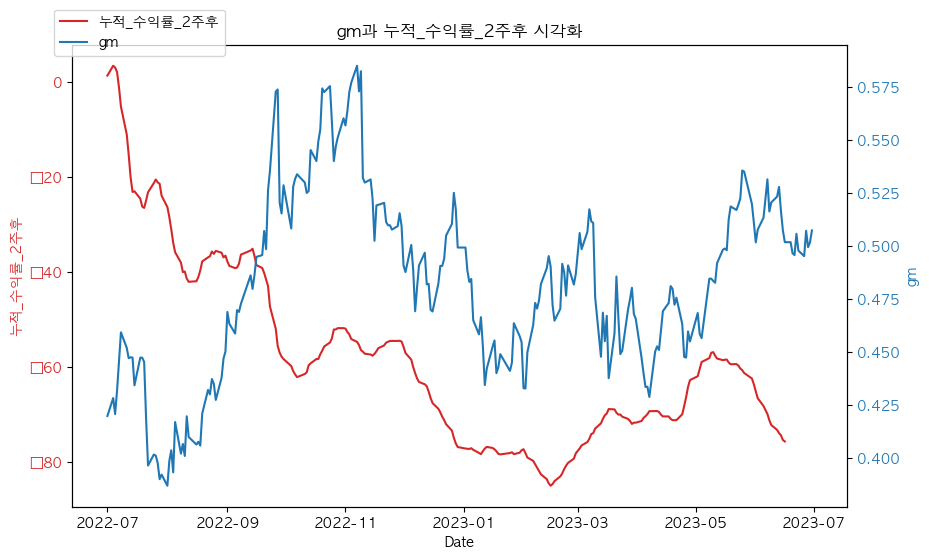

In [53]:
# 2주뒤 수익률 시각화

# 그래프의 기본 틀 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# ax1에 '수익률_1주후' 그리기
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('누적_수익률_2주후', color=color)
line1, = ax1.plot(df['Date'], df['누적_수익률_2주후'], color=color, label='누적_수익률_2주후')  # label 추가
ax1.tick_params(axis='y', labelcolor=color)

# ax2는 ax1과 x축을 공유하며 y축은 독립적으로 사용
ax2 = ax1.twinx()

# ax2에 'gm' 그리기
color = 'tab:blue'
ax2.set_ylabel('gm', color=color)
line2, = ax2.plot(df['Date'], df['gm'], color=color, label='gm')  # label 추가
ax2.tick_params(axis='y', labelcolor=color)

# 범례 추가
fig.legend(handles=[line1, line2], loc='upper left', bbox_to_anchor=(0.1, 0.95))  # 두 선의 범례를 추가

# 그래프 표시
plt.title("gm과 누적_수익률_2주후 시각화")
plt.show()


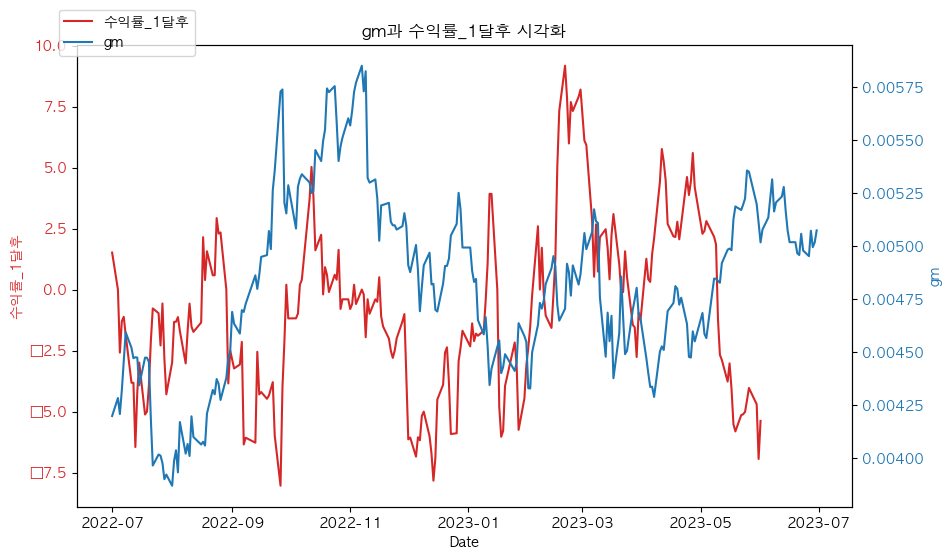

In [268]:
# 1달뒤 수익률 시각화

# 그래프의 기본 틀 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# ax1에 '수익률_1주후' 그리기
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('수익률_1달후', color=color)
line1, = ax1.plot(df['Date'], df['수익률_1달후'], color=color, label='수익률_1달후')  # label 추가
ax1.tick_params(axis='y', labelcolor=color)

# ax2는 ax1과 x축을 공유하며 y축은 독립적으로 사용
ax2 = ax1.twinx()

# ax2에 'gm' 그리기
color = 'tab:blue'
ax2.set_ylabel('gm', color=color)
line2, = ax2.plot(df['Date'], df['gm'], color=color, label='gm')  # label 추가
ax2.tick_params(axis='y', labelcolor=color)

# 범례 추가
fig.legend(handles=[line1, line2], loc='upper left', bbox_to_anchor=(0.1, 0.95))  # 두 선의 범례를 추가

# 그래프 표시
plt.title("gm과 수익률_1달후 시각화")
plt.show()


/Users/kevincho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


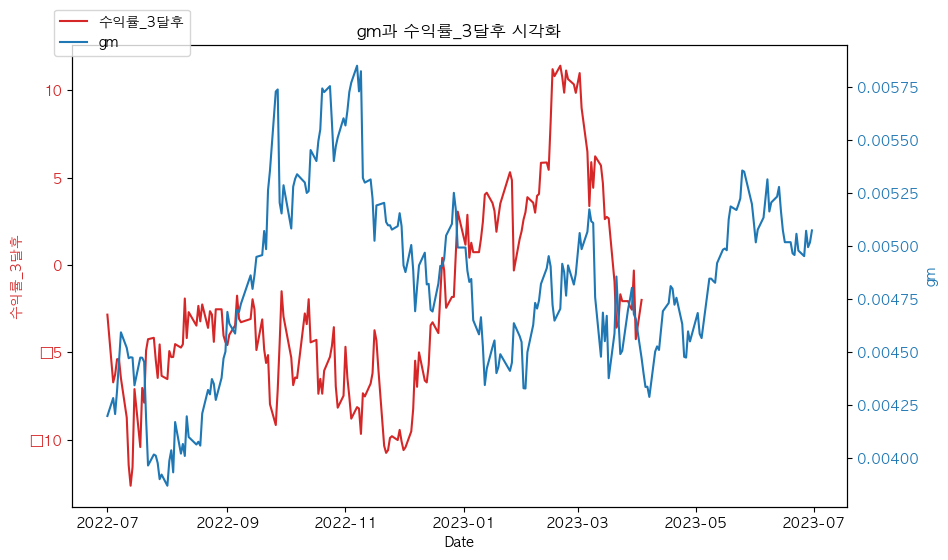

In [276]:
# 3달뒤 수익률 시각화

# 그래프의 기본 틀 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# ax1에 '수익률_1주후' 그리기
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('수익률_3달후', color=color)
line1, = ax1.plot(df['Date'], df['수익률_3달후'], color=color, label='수익률_3달후')  # label 추가
ax1.tick_params(axis='y', labelcolor=color)

# ax2는 ax1과 x축을 공유하며 y축은 독립적으로 사용
ax2 = ax1.twinx()

# ax2에 'gm' 그리기
color = 'tab:blue'
ax2.set_ylabel('gm', color=color)
line2, = ax2.plot(df['Date'], df['gm'], color=color, label='gm')  # label 추가
ax2.tick_params(axis='y', labelcolor=color)

# 범례 추가
fig.legend(handles=[line1, line2], loc='upper left', bbox_to_anchor=(0.1, 0.95))  # 두 선의 범례를 추가

# 그래프 표시
plt.title("gm과 수익률_3달후 시각화")
plt.show()


In [290]:
# 넓게보기 위해 데이터 잘라서 보기 (절반)
num = df.shape[0]/2 # 원래 데이터프레임을 반으로 나눈 값
df_half = df[:int(num)]

/Users/kevincho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


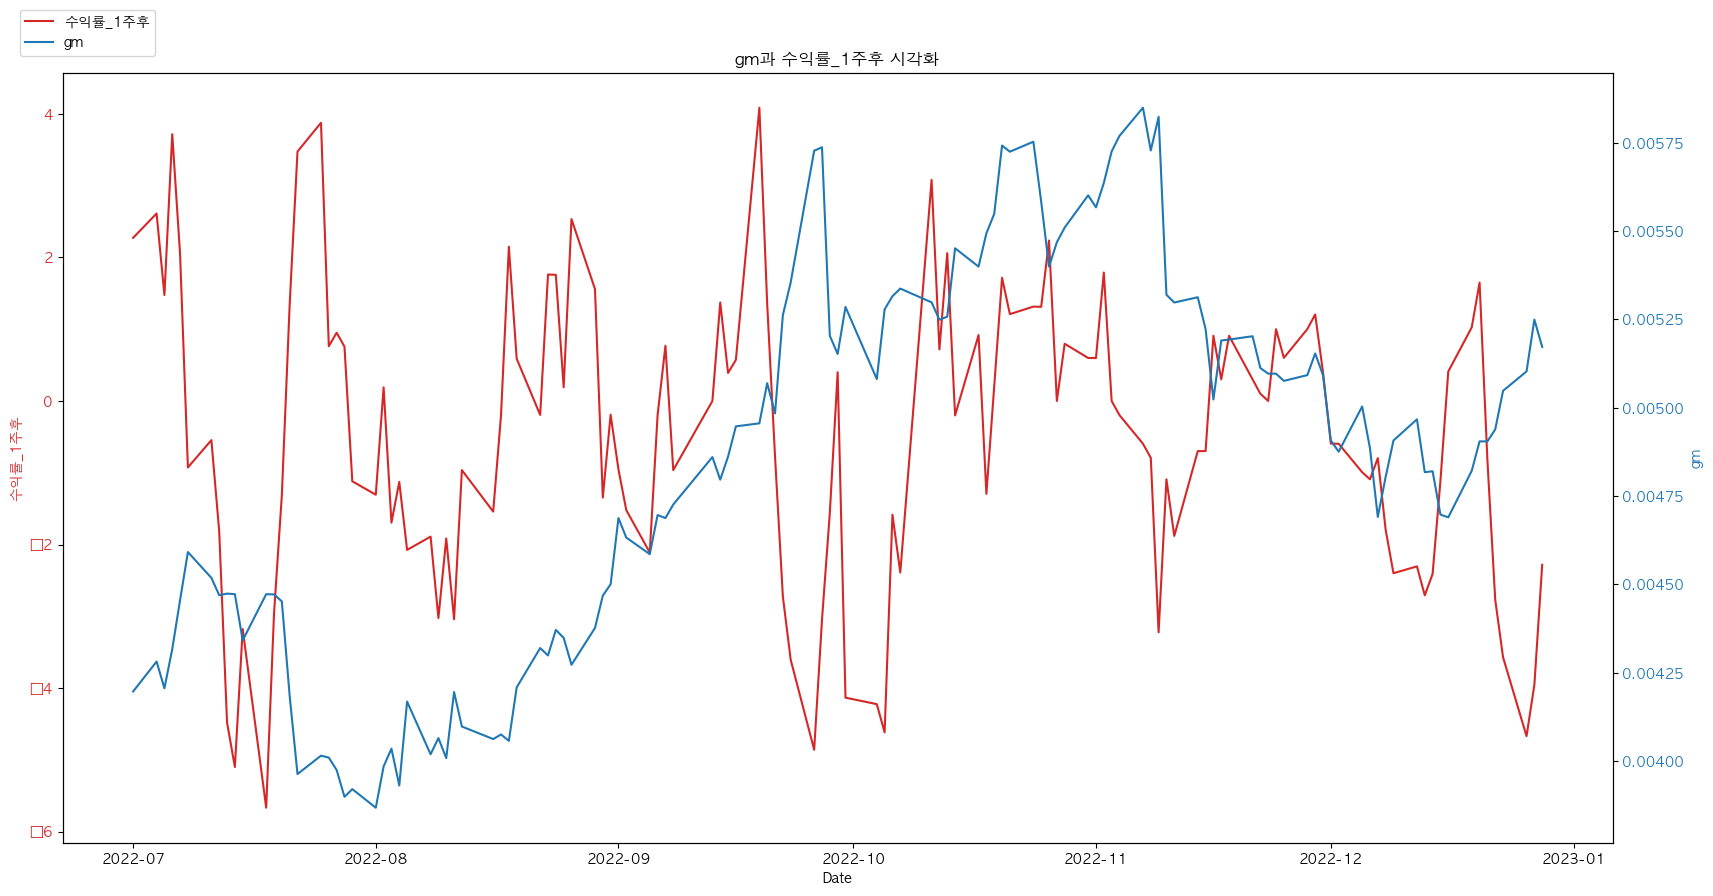

In [291]:
# 일주일뒤 수익률 시각화

# 그래프의 기본 틀 생성
fig, ax1 = plt.subplots(figsize=(20, 10))

# ax1에 '수익률_1주후' 그리기
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('수익률_1주후', color=color)
line1, = ax1.plot(df_half['Date'], df_half['수익률_1주후'], color=color, label='수익률_1주후')  # label 추가
ax1.tick_params(axis='y', labelcolor=color)

# ax2는 ax1과 x축을 공유하며 y축은 독립적으로 사용
ax2 = ax1.twinx()

# ax2에 'gm' 그리기
color = 'tab:blue'
ax2.set_ylabel('gm', color=color)
line2, = ax2.plot(df_half['Date'], df_half['gm'], color=color, label='gm')  # label 추가
ax2.tick_params(axis='y', labelcolor=color)

# 범례 추가
fig.legend(handles=[line1, line2], loc='upper left', bbox_to_anchor=(0.1, 0.95))  # 두 선의 범례를 추가

# 그래프 표시
plt.title("gm과 수익률_1주후 시각화")
plt.show()


### 상관관계 구하기

In [295]:
cleaned_df['gm'] = pd.to_numeric(cleaned_df['gm'], errors='coerce')
cleaned_df['수익률_1주후'] = pd.to_numeric(cleaned_df['수익률_1주후'], errors='coerce')

# 다시 NaN 값을 제거합니다.
cleaned_df = cleaned_df.dropna(subset=['gm', '수익률_1주후'])

correlation = cleaned_df['gm'].corr(cleaned_df['수익률_1주후'])
print(correlation)

-0.15610661475258655


/var/folders/yd/1_xwcyjj6z58p2vptxk1dwvm0000gn/T/ipykernel_42376/4236571542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['gm'] = pd.to_numeric(cleaned_df['gm'], errors='coerce')
/var/folders/yd/1_xwcyjj6z58p2vptxk1dwvm0000gn/T/ipykernel_42376/4236571542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['수익률_1주후'] = pd.to_numeric(cleaned_df['수익률_1주후'], errors='coerce')


In [296]:
cleaned_df['gm'] = pd.to_numeric(cleaned_df['gm'], errors='coerce')
cleaned_df['수익률_1달후'] = pd.to_numeric(cleaned_df['수익률_1달후'], errors='coerce')

# 다시 NaN 값을 제거합니다.
cleaned_df = cleaned_df.dropna(subset=['gm', '수익률_1달후'])

correlation = cleaned_df['gm'].corr(cleaned_df['수익률_1달후'])
print(correlation)

-0.06837214567695671


### 상관관계 구하기(feat.표준화)

In [298]:
from sklearn.preprocessing import StandardScaler

# 표준화를 위한 스케일러 초기화
scaler = StandardScaler()

# 'gm'과 '수익률_1주후' 컬럼만 추출하여 표준화
scaled_values = scaler.fit_transform(cleaned_df[['gm', '수익률_1주후']])

# 표준화된 값을 다시 데이터프레임에 할당
cleaned_df['gm_scaled'] = scaled_values[:, 0]
cleaned_df['수익률_1주후_scaled'] = scaled_values[:, 1]

# 표준화된 값의 상관계수 계산
correlation = cleaned_df['gm_scaled'].corr(cleaned_df['수익률_1주후_scaled'])
print(correlation)


-0.12467480940836248


In [299]:
from sklearn.preprocessing import StandardScaler

# 표준화를 위한 스케일러 초기화
scaler = StandardScaler()

# 'gm'과 '수익률_1주후' 컬럼만 추출하여 표준화
scaled_values = scaler.fit_transform(cleaned_df[['gm', '수익률_1달후']])

# 표준화된 값을 다시 데이터프레임에 할당
cleaned_df['gm_scaled'] = scaled_values[:, 0]
cleaned_df['수익률_1달후_scaled'] = scaled_values[:, 1]

# 표준화된 값의 상관계수 계산
correlation = cleaned_df['gm_scaled'].corr(cleaned_df['수익률_1달후_scaled'])
print(correlation)


-0.06837214567695675
